In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [39]:
# Loading the csv data 
gold_data = pd.read_csv('gld_price_data.csv')


In [40]:
# print 5 rows in dataset 

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [41]:
# the last 5 rows in dataset 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [42]:
# numbers of rows and column 
gold_data.shape 

(2290, 6)

In [43]:
# Getting some basic information about the data 

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [44]:
 # Checking the number of missing values 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [45]:
# Getting the statstical measures of the data 

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [46]:

# drop date column 
gold_data = gold_data.drop(['Date'], axis=1)
# Correlation 
correlation = gold_data.corr()

<Axes: >

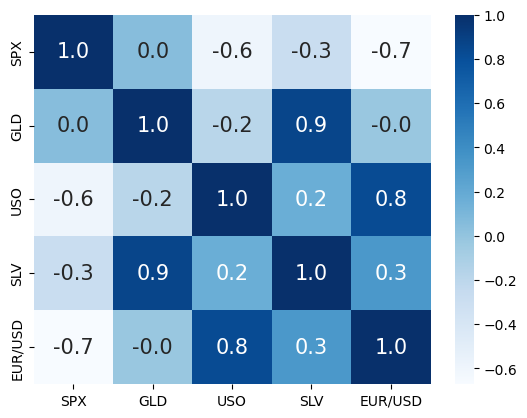

In [47]:
sns.heatmap(correlation, annot=True, fmt='.1f', cmap='Blues', annot_kws={'size':15})

In [48]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

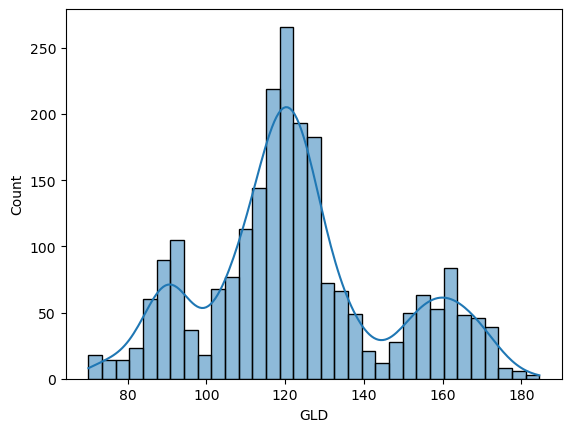

In [49]:
# checking the distribution of GLD Price 

sns.histplot(gold_data['GLD'],kde=True)

In [50]:
# Splitting the features and target 
X = gold_data.drop(['GLD'], axis=1)
y = gold_data['GLD'] 

In [51]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [52]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [53]:
# Spiltting into training data and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [54]:
# Model Training: 
# Random Forest Regressor 

regressor  = RandomForestRegressor(n_estimators=100)


In [55]:
# Training the model 
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
# Model evaluation 
# prediction on test data 
test_data_prediction = regressor.predict(X_test)

In [57]:
print(test_data_prediction)

[168.46969884  82.14459981 115.96109973 127.67530063 120.74080149
 154.8591972  150.20839797 126.1538007  117.50029862 126.03010079
 116.60270064 172.01860124 141.99479832 167.84339828 115.21889968
 117.72230035 139.08570282 170.21040123 159.15800265 159.38649953
 155.07599998 125.27860025 175.79990001 156.93430346 125.27290044
  93.86169942  77.56850026 120.55129989 119.04879911 167.57180034
  88.16560066 125.29780019  91.05650108 117.68560033 121.08549901
 136.79350057 115.52650108 115.33020058 148.12379987 107.03710099
 104.2249023   87.23639781 126.47160045 117.81290029 153.267099
 119.64120009 108.42920018 108.10299854  93.14910059 126.76299869
  75.19800005 113.7254992  121.3090003  111.28769906 118.78509874
 120.40119949 159.01160011 168.00550108 146.9611967   85.75299853
  94.4467004   87.00559922  90.55220005 119.14690043 126.41660053
 127.57769995 169.36659983 122.25769942 117.3498991   98.48920009
 168.16660086 143.01389868 132.30490339 121.16160208 120.69489954
 119.6676005

In [60]:
# R squared error 

error_score = metrics.r2_score(y_test, test_data_prediction)
print("R sqaured error " + str(error_score))

R sqaured error 0.9892363250487862


[168.020004, 81.230003, 112.32, 127.589996, 119.620003, 154.210007, 148.910004, 126.190002, 117.470001, 125.739998, 115.379997, 167.119995, 141.630005, 169.559998, 115.599998, 119.669998, 132.949997, 170.399994, 159.369995, 173.529999, 154.720001, 128.119995, 177.720001, 157.190002, 125.309998, 93.400002, 76.790001, 119.690002, 118.989998, 167.389999, 87.5, 124.980003, 91.230003, 115.489998, 120.949997, 133.809998, 116.690002, 113.809998, 133.580002, 105.970001, 105.120003, 87.959999, 126.82, 116.860001, 159.259995, 119.459999, 109.160004, 108.620003, 93.269997, 127.160004, 72.260002, 113.470001, 119.68, 109.139999, 119.309998, 120.050003, 159.889999, 161.490005, 146.740005, 85.809998, 93.709999, 85.550003, 91.029999, 118.489998, 126.449997, 126.980003, 171.699997, 122.400002, 116.410004, 97.959999, 169.630005, 142.639999, 131.809998, 121.360001, 124.0, 119.699997, 113.889999, 118.919998, 105.639999, 127.669998, 114.32, 107.309998, 114.82, 119.230003, 86.860001, 87.010002, 147.729996, 

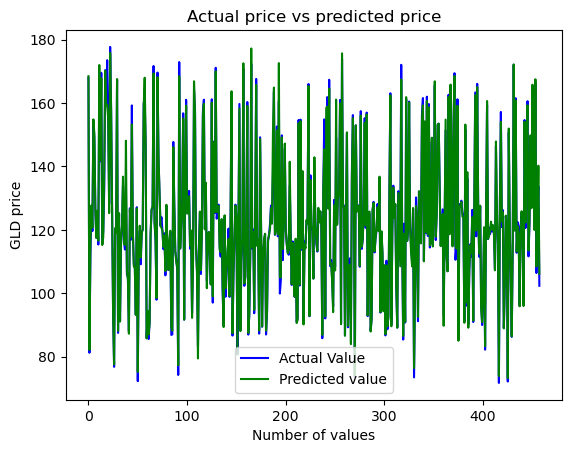

In [65]:
y_test   = list(y_test) 
print(y_test)
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted value')
plt.title("Actual price vs predicted price")
plt.xlabel("Number of values")
plt.ylabel('GLD price')
plt.legend()
plt.show()